In [1]:
import numpy as np
from PIL import Image

from exp.params import OBJ_INDEX_LIST, GRASP_PROFILES

ROBOT_NAME = "shadowhand" # "allegro"
grasp_profile = GRASP_PROFILES[ROBOT_NAME]

In [2]:
SUCESS_PERCENTAGE = 20
print("SUCESS_PERCENTAGE: ", SUCESS_PERCENTAGE)
result_file_path = "/home/yizhou/Research/Data/shadowhand_exp_learning823.txt"
MODEL_PATH = "/home/yizhou/Research/temp0/fasterrcnn_resnet50_fpn823.pth"

SUCESS_PERCENTAGE:  20


In [3]:
SHOW_IMAGE = True

In [4]:
import getpass
user = getpass.getuser()

usd_path = grasp_profile["usd_path"]
print(usd_path)

from omni.isaac.kit import SimulationApp    

omniverse://localhost/Users/yizhou/scene2.usd


In [5]:
simulation_app = SimulationApp({"headless": True, "open_usd": usd_path,  "livesync_usd": usd_path}) 

Starting kit application with the fillowing args:  ['/home/yizhou/.local/share/ov/pkg/isaac_sim-2022.1.0/exts/omni.isaac.kit/omni/isaac/kit/simulation_app.py', '/home/yizhou/.local/share/ov/pkg/isaac_sim-2022.1.0/apps/omni.isaac.sim.python.kit', '--/app/tokens/exe-path=/home/yizhou/.local/share/ov/pkg/isaac_sim-2022.1.0/kit', '--/persistent/app/viewport/displayOptions=3094', '--/rtx/materialDb/syncLoads=True', '--/rtx/hydra/materialSyncLoads=True--/omni.kit.plugin/syncUsdLoads=True', '--/app/renderer/resolution/width=1280', '--/app/renderer/resolution/height=720', '--/app/window/width=1440', '--/app/window/height=900', '--/renderer/multiGpu/enabled=True', '--ext-folder', '/home/yizhou/.local/share/ov/pkg/isaac_sim-2022.1.0/exts', '--ext-folder', '/home/yizhou/.local/share/ov/pkg/isaac_sim-2022.1.0/apps', '--portable', '--no-window']
Passing the following args to the base kit application:  ['-f', '/home/yizhou/.local/share/jupyter/runtime/kernel-edf0a3c8-056a-4b87-9ea8-e3187b2b0039.json

OmniAssetFileFormat


[2.364s] [ext: omni.mdl-0.1.0] startup
[2.392s] [ext: omni.kit.menu.create-1.0.2] startup
[2.394s] [ext: omni.kit.window.file_exporter-1.0.4] startup
[2.396s] [ext: omni.kit.window.drop_support-1.0.0] startup
[2.398s] [ext: omni.kit.material.library-1.3.10] startup
[2.401s] [ext: omni.kit.window.property-1.6.3] startup
[2.403s] [ext: omni.kit.context_menu-1.3.9] startup
[2.408s] [ext: omni.kit.window.file_importer-1.0.4] startup
[2.410s] [ext: omni.kit.stage_templates-1.1.2] startup
[2.412s] [ext: omni.kit.widget.stage-2.6.15] startup
[2.420s] [ext: omni.kit.window.file-1.3.16] startup
[2.423s] [ext: omni.debugdraw-0.1.0] startup
[2.431s] [ext: omni.kit.window.content_browser-2.4.28] startup
[2.444s] [ext: omni.kit.widget.prompt-1.0.1] startup
[2.445s] [ext: omni.kit.property.usd-3.14.8] startup
[2.492s] [ext: omni.hydra.engine.stats-1.0.0] startup
[2.501s] [ext: omni.kit.widget.settings-1.0.0] startup
[2.503s] [ext: omni.graph.tools-1.3.5] startup
[2.590s] [ext: omni.graph.core-2.27.0

2022-08-24 20:32:37 [2,810ms] [Error] [rtx.neuraylib.plugin] [DYNLIB:IO]   0.1   DYNLIB io   error: /home/yizhou/.local/share/ov/pkg/isaac_sim-2022.1.0/kit/python/bin/libs/iray/libnvindex.so: cannot open shared object file: No such file or directory
2022-08-24 20:32:37 [2,810ms] [Error] [rtx.neuraylib.plugin] [INDEX:MAIN]   0.1   INDEX  main error: Failed to load /home/yizhou/.local/share/ov/pkg/isaac_sim-2022.1.0/kit/python/bin/libs/iray/libnvindex.so


Warp initialized:
   Version: 0.2.1
   Using CUDA device: NVIDIA GeForce RTX 3090
   Using CPU compiler: /usr/bin/g++
[3.808s] [ext: omni.kit.window.preferences-1.2.1] startup
[3.852s] [ext: omni.kit.ui_test-1.2.0] startup
[3.855s] [ext: omni.graph.ui-1.6.1] startup
[3.893s] [ext: omni.kvdb-0.0.0] startup
[3.897s] [ext: omni.kit.widget.searchfield-1.0.6] startup
[3.901s] [ext: omni.convexdecomposition-1.4.12] startup
[3.907s] [ext: omni.graph.action-1.17.0] startup
[3.926s] [ext: omni.localcache-0.0.0] startup
[3.930s] [ext: omni.usdphysics-1.4.12] startup
[3.934s] [ext: omni.graph.scriptnode-0.5.0] startup
[3.939s] [ext: omni.physx-1.4.12-5.1] startup
[3.979s] [ext: omni.kit.usd_undo-0.1.0] startup
[3.981s] [ext: omni.graph.nodes-1.25.0] startup
[4.015s] [ext: omni.physx.commands-1.4.12-5.1] startup
[4.022s] [ext: omni.syntheticdata-0.2.1] startup
[4.064s] [ext: omni.physx.ui-1.4.12-5.1] startup
[4.158s] [ext: omni.warp-0.2.1] startup
[6.883s] [ext: omni.kit.renderer.capture-0.0.0] st

In [6]:
# world
import omni
from omni.isaac.core import World
world = World()


In [7]:
# reset scene
mobility_prim = world.scene.stage.GetPrimAtPath("/World/Game/mobility")
if mobility_prim:
    omni.kit.commands.execute("DeletePrims", paths=["/World/Game/mobility"])

In [8]:
# reset scene
replicator_prim = world.scene.stage.GetPrimAtPath("/Replicator")
if replicator_prim:
    omni.kit.commands.execute("DeletePrims", paths=["/Replicator"])


In [9]:
# custom import
from open_env import OpenEnv
from hand_env import HandEnv
from hand_common import HandBase
from render.utils import prim_random_color, LOOKS_PATH

from task.checker import TaskChecker
from task.instructor import SceneInstructor
from omni.isaac.core.prims.xform_prim import XFormPrim

env = OpenEnv()
env.add_camera()
env.setup_viewport()

In [10]:
controller = HandBase(grasp_profile["articulation_root"], "/World/AnchorXform")
controller.grasp_profile = grasp_profile["offset"]


In [11]:
# init
world.reset()
controller.start()
world.scene.add(controller.robots)

# hide robot
hand_prim = world.scene.stage.GetPrimAtPath(grasp_profile["robot_path"])
hand_prim.GetAttribute('visibility').Set('invisible')

simlation context numpy None
num_envs 1


True

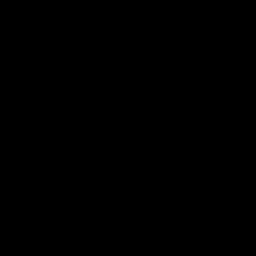

In [12]:
env.get_image()

# !Cliport?

In [13]:
# load deep leanrning model
from exp.model import load_vision_model

MODEL_PATH = "/home/yizhou/Research/temp0/custom_cliport823.pth"
model = load_vision_model(model_path = MODEL_PATH, model_name = "custom_cliport")

Some weights of the model checkpoint at microsoft/resnet-18 were not used when initializing ResNetModel: ['classifier.1.bias', 'classifier.1.weight']
- This IS expected if you are initializing ResNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ResNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [14]:
OBJ_INDEX = 3

In [15]:
env.add_object(OBJ_INDEX, scale = 0.1)

mobility_obj = XFormPrim("/World/Game/mobility")
mobility_obj_name = mobility_obj.name

# randomize color

# reset look in scene
mat_look_prim = world.scene.stage.GetPrimAtPath(LOOKS_PATH)
if mat_look_prim:
    omni.kit.commands.execute("DeletePrims", paths=[LOOKS_PATH])

world.step(render = False)

scene_instr = SceneInstructor()
scene_instr.analysis()

handle_num = len(list(scene_instr.valid_handle_list.keys()))

for HANDLE_INDEX in range(handle_num):
    handle_path_str = list(scene_instr.valid_handle_list.keys())[HANDLE_INDEX]
    prim_random_color(handle_path_str)
    
world.scene.add(mobility_obj)
world.reset()
world.render()

add object
loading asset from omni nucleus
physics material: path:  /World/Game/mobility/link_0/visuals/handle_8/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_0/visuals/handle_9/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_0/visuals/handle_10/physicsMaterial
add physics material to handle
analysis_spatial_rel:  {'/World/Game/mobility/link_0/visuals/handle_8': {'joint_type': 'PhysicsRevoluteJoint', 'cabinet_type': 'door', 'vertical_description': '', 'horizontal_description': '', 'joint': 'joint_0', 'relative_to_game_center': 'right', 'direction': 'horizontal'}}
ndow.generic-1.3.8] startup
[8.078s] [ext: omni.isaac.utils-0.1.11] startup
[8.085s] [ext: omni.isaac.universal_robots-0.2.1] startup
[8.087s] [ext: omni.kit.property.audio-1.0.5] startup
[8.090s] [ext: omni.kit.property.skel-1.0.1] startup
[8.092s] [ext: omni.kit.property.render-1.1.0] startup
[8.094s] [ext: omni.kit.property

2022-08-24 20:33:08 [33,788ms] [Warning] [omni.physx.plugin] PhysicsUSD: Parse collision - triangle mesh collision (approximation None/MeshSimplifixation) cannot be a part of a dynamic body, falling back to convexHull approximation: /World/Game/mobility/link_0/visuals/handle_10
2022-08-24 20:33:08 [33,791ms] [Warning] [omni.physx.plugin] PhysicsUSD: CreateJoint - cannot create a joint with disjointed body transforms: /World/shadow_hand/joints/rootJoint
2022-08-24 20:33:08 [33,792ms] [Warning] [omni.physx.plugin] The rigid body at /World/Game/mobility/base has a possibly invalid inertia tensor of {1.0, 1.0, 1.0} and a negative mass. Either specify correct values in the mass properties, or add collider(s) to any shape(s) that you wish to automatically compute mass properties for. If you do not want the objects to collide, add colliders regardless then disable the 'enable collision' property.
2022-08-24 20:33:08 [33,827ms] [Warning] [gpu.foundation.plugin] Requesting texture to use textur

2022-08-24 20:33:08 [33,903ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/link_0/visuals/handle_9 has corrupted data in primvar st: buffer size 468 doesn't match expected size 936 in faceVarying primvars
2022-08-24 20:33:08 [33,903ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/link_0/visuals/handle_10 has corrupted data in primvar st: buffer size 468 doesn't match expected size 936 in faceVarying primvars
2022-08-24 20:33:09 [34,880ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/link_1/visuals/frame_vertical_bar_26 has corrupted data in primvar st: buffer size 36 doesn't match expected size 72 in faceVarying primvars
2022-08-24 20:33:09 [34,880ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/link_1/visuals/shelf_4 has corrupted data in primvar st: buffer size 36 doesn't match expected size 72 in faceVarying primvars
2022-08-24 20:33:09 [34,880ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/link_1/visuals/frame_vertical_bar_28 has corrupted data in primvar st: 

In [16]:
world.step(render = True)
world.render()
image_array =env.get_image(return_array=True)

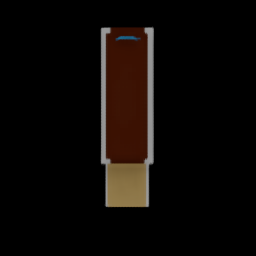

In [17]:
image = env.get_image()
image.convert('RGB')

In [18]:
import matplotlib.pyplot as plt

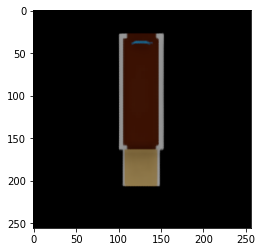

In [19]:
plt.imshow(image)

In [20]:
scene_instr.valid_handle_list

{'/World/Game/mobility/link_0/visuals/handle_8': {'joint_type': 'PhysicsRevoluteJoint',
  'cabinet_type': 'door',
  'vertical_description': '',
  'horizontal_description': '',
  'joint': 'joint_0',
  'relative_to_game_center': 'right',
  'direction': 'horizontal'}}

In [21]:
scene_instr.valid_handle_list

{'/World/Game/mobility/link_0/visuals/handle_8': {'joint_type': 'PhysicsRevoluteJoint',
  'cabinet_type': 'door',
  'vertical_description': '',
  'horizontal_description': '',
  'joint': 'joint_0',
  'relative_to_game_center': 'right',
  'direction': 'horizontal'}}

In [22]:
HANDLE_INDEX = 0

handle_path_str = list(scene_instr.valid_handle_list.keys())[HANDLE_INDEX]
h_desc = scene_instr.valid_handle_list[handle_path_str]["horizontal_description"]
v_desc = scene_instr.valid_handle_list[handle_path_str]["vertical_description"]

handle_joint_type = scene_instr.valid_handle_list[handle_path_str]["joint_type"]
handle_joint = scene_instr.valid_handle_list[handle_path_str]["joint"]
# handle_rel_direciton = scene_instr.valid_handle_list[handle_path_str]["relative_to_game_center"]

cabinet_type = scene_instr.valid_handle_list[handle_path_str]["cabinet_type"]
# add_update_semantics(prim, "handle")

text = f"{v_desc}_{h_desc}_{cabinet_type}"
text = text.replace("_"," ").replace("-"," ").replace("  ", " ").strip()
print(text)


door


In [23]:
model = model.cuda()

In [24]:
bbox_center, handle_direction = model.pred_box_pos_and_dir(image.convert('RGB'), text)

In [25]:
bbox_center

(45, 125)

In [26]:
the_box = scene_instr.get_bbox_world_position([bbox_center[1], bbox_center[0], bbox_center[1], bbox_center[0]])

In [27]:
the_box

[0.016572389078498295,
 0.9585027645051194,
 0.016572389078498295,
 0.9585027645051194]

In [ ]:
# -------------------- RESNET

In [ ]:
scene_instr.model = model
scene_instr.predict_bounding_boxes(image_array[:,:,:3])

# if not valid
if not scene_instr.is_obj_valid:
    print("object not valid: ", OBJ_INDEX)
    simulation_app.close()
    exit()

# if no valid predicted boundbox
if not scene_instr.is_pred_valid:
    with open(result_file_path, "a") as f:
        f.write(f"{OBJ_INDEX}, invalid prediction\n")

    world.scene.remove_object(mobility_obj_name)
    world.reset()
    controller.xforms.set_world_poses(positions=np.array([[0,0,0]]), orientations = np.array([[1, 0, 0, 0]])) # WXYZ
    for _ in range(30):
        world.step()

    # continue

In [ ]:
HANDLE_INDEX = 0

In [ ]:
################################################## LEARNING SOLUTION ##############################

v_desc = scene_instr.valid_handle_list[handle_path_str]["vertical_description"]
h_desc = scene_instr.valid_handle_list[handle_path_str]["horizontal_description"]

the_box = scene_instr.get_box_from_desc(v_desc, h_desc)
handle_direction = "horizontal" if (the_box[2] - the_box[0]) > (the_box[3] - the_box[1]) else "vertical" 


# Control

In [28]:
# Task
# print("handle_path_str, handle_joint_type, handle_joint, rel_direction", handle_path_str, handle_joint_type, handle_joint, handle_rel_direciton)
task_checker = TaskChecker("mobility", handle_joint, handle_joint_type, IS_RUNTIME=True)

In [29]:
# init
world.reset()
controller.xforms.set_world_poses(positions=np.array([[0,0,0]]), orientations = np.array([[1, 0, 0, 0]])) # WXYZ
for _ in range(60):
    world.step() # wait some time

t_1: buffer size 6 doesn't match expected size 48 in faceVarying primvars
2022-08-24 20:33:09 [34,880ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/link_0/visuals/cabinet_door_surface_8 has corrupted data in primvar st_1: buffer size 18 doesn't match expected size 72 in faceVarying primvars
2022-08-24 20:33:09 [34,880ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/link_0/visuals/cabinet_door_surface_9 has corrupted data in primvar st_1: buffer size 18 doesn't match expected size 72 in faceVarying primvars
2022-08-24 20:33:09 [34,880ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/link_0/visuals/cabinet_door_surface_11 has corrupted data in primvar st: buffer size 6 doesn't match expected size 12 in faceVarying primvars
2022-08-24 20:33:09 [34,880ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/link_0/visuals/cabinet_door_surface_12 has corrupted data in primvar st: buffer size 96 doesn't match expected size 192 in faceVarying primvars
2022-08-24 20:33:09 [34,880ms] [

In [30]:
graps_pos, grasp_rot = controller.calculate_grasp_location_from_pred_box(the_box, verticle= handle_direction == "horizontal")
print("graps_pos, grasp_rot ", graps_pos, grasp_rot )

graps_pos, grasp_rot  [[0.578      0.01657239 0.5785028 ]] [[-0.5  0.5 -0.5  0.5]]


In [31]:
# move close to handle
graps_pos[...,0] -= 0.1
controller.xforms.set_world_poses(graps_pos, grasp_rot)
for _ in range(300):
    world.step(render=SHOW_IMAGE)         

print("move to handle")
# move to handle
graps_pos[...,0] += 0.1
controller.xforms.set_world_poses(graps_pos, grasp_rot)
for _ in range(100):
    world.step(render=SHOW_IMAGE)     


move to handle


In [32]:
ROBOT_NAME

'shadowhand'

In [37]:
# close finger
print("close finger")
finger_pos = grasp_profile["finger_pos"]

if ROBOT_NAME == "allegro":   
    for i in range(120):
        controller.robots.set_joint_position_targets(finger_pos * i / 120) # 
        world.step(render=SHOW_IMAGE)       

elif ROBOT_NAME == "frankahand":      
    for i in range(100):
        finger_pos -= 0.01
        controller.robots.set_joint_position_targets(finger_pos) # 
        world.step(render=SHOW_IMAGE) 

elif ROBOT_NAME == "shadowhand": 
    dof_pos = finger_pos
    for i in range(60):
        # thumb
        dof_pos[6] += 0.01
        dof_pos[11] += 0.02
        # dof_pos[16] += 0.01
        dof_pos[21] += -0.01


        dof_pos[7] += 0.01
        dof_pos[8] += 0.01
        dof_pos[9] += 0.01
        # dof_pos[14] += 0.01

        dof_pos[12] += 0.01
        dof_pos[13] += 0.01
        dof_pos[14] += 0.01

        dof_pos[17] += 0.01
        dof_pos[18] += 0.01
        dof_pos[19] += 0.01

        # pinky
        dof_pos[15] += 0.01
        dof_pos[20] += 0.01
        dof_pos[22] += 0.01

        controller.robots.set_joint_position_targets(dof_pos) # 
        world.step(render=True)     


close finger


In [34]:
print("pull out")
# pull out
if ROBOT_NAME == "allegro": 
    for i in range(300):
        graps_pos[...,0] -= 0.001
    #   env.robots.set_world_poses(graps_pos, grasp_rot)
        controller.xforms.set_world_poses(graps_pos, grasp_rot)
        controller.robots.set_joint_position_targets(finger_pos)
        world.step(render=SHOW_IMAGE)

elif ROBOT_NAME == "frankahand": 
    for i in range(300):
        graps_pos[...,0] -= 0.001
        controller.xforms.set_world_poses(graps_pos, grasp_rot)
        controller.robots.set_joint_position_targets(finger_pos)
        finger_pos += 0.015
        world.step(render=SHOW_IMAGE)

elif ROBOT_NAME == "shadowhand": 
    # pull out
    for i in range(300):
        graps_pos[...,0] -= 0.001
    #   env.robots.set_world_poses(graps_pos, grasp_rot)
        controller.xforms.set_world_poses(graps_pos, grasp_rot)
        controller.robots.set_joint_position_targets(dof_pos)
        dof_pos *= 0.997
        # print(dof_pos)

        world.step(render=SHOW_IMAGE)

pull out


In [ ]:
# check task
task_checker.joint_checker.compute_percentage()

# Reset

In [ ]:
world.reset()
controller.xforms.set_world_poses(positions=np.array([[0,0,0]]), orientations = np.array([[1, 0, 0, 0]])) # WXYZ

for _ in range(30):
    world.step()

In [ ]:
world.scene.remove_object(mobility_obj_name)

In [ ]:
world.step()